Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

 -  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
    considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail that match CHAR


    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e.
average length of uninterrupted sequences of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type
`capital run length longest` i.e. length of longest uninterrupted sequence of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length total` i.e.
sum of length of uninterrupted sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)




In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix

### Load the data  stored in `path` using `.read_csv()` api.

In [41]:
df = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Email Classification - Spam or Ham using logistic regression\\data\\email_data.csv")
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [42]:
df = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Email Classification - Spam or Ham using logistic regression\\data\\email_data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Get an overview of your data by using info() and describe() functions of pandas.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [44]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<AxesSubplot:>

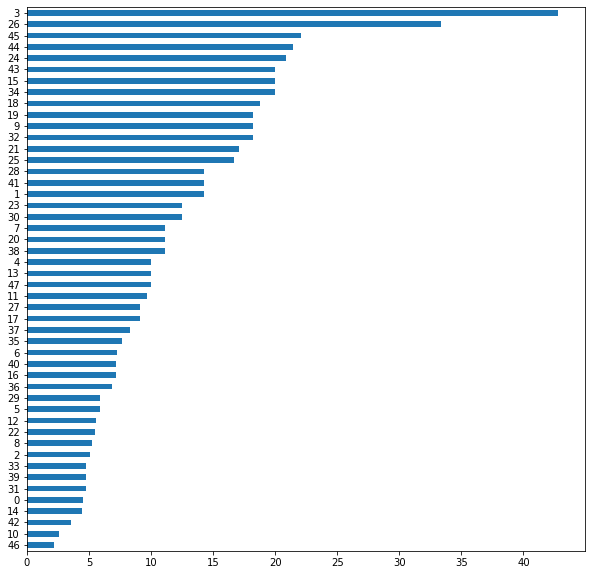

In [45]:
df.iloc[:,:48].max().sort_values(ascending=True).plot.barh(figsize=(10,10))

### Split the data into train and test set and fit the base logistic regression model on train set.

In [46]:
##base model
X= df.iloc[:,:57]
y= df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

base_lr = LogisticRegression(random_state=42)
base_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

###  You can also compare your predicted values and observed values by printing out values of logistic.predict(X_test[ ]) and  y_test[ ].values

In [47]:
base_lr.predict(X_test[:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
base_lr.predict(X_test.iloc[:10,:])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [49]:
y_test[:10].values

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [50]:
base_lr.score(X_test, y_test)

0.9239681390296887

In [51]:
y_pred = base_lr.predict(X_test)
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[759,  45],
       [ 60, 517]], dtype=int64)

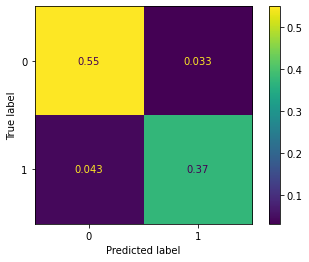

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(base_lr, X_test, y_test, normalize='all')

### Find out the accuracy , print out the Classification report and Confusion Matrix.

### As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity), So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [53]:
df1=df.copy()
corr_matrix = df1.drop(57, axis=1).corr().abs()
upper_masks = np.triu (np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper = corr_matrix.where(upper_masks)
to_drop = [column for column in upper.columns if any(upper[column]>.75)]
df1.drop(to_drop, axis = 1, inplace=True)

### Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [54]:
## model1
X= df1.iloc[:,:-1]
y= df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=101)

lr1 = LogisticRegression(random_state=101)
lr1.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [55]:
lr1.score(X_test, y_test)

0.9167270094134685

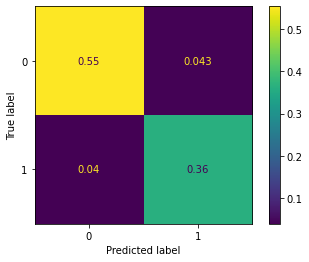

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr1, X_test, y_test, normalize='all')

###  Find out the accuracy , print out the Classification report and Confusion Matrix.

###  After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test) to see whether we can increase our score. Find the optimum number of features using Chi Square and fit the logistic model on train data.



In [57]:
nof = [20,25,30, 35, 40, 45, 50, 55]
high_score = 0
nof = 0
n = 20
features = SelectKBest(score_func=chi2, k = n)

NameError: name 'SelectKBest' is not defined

###  Find out the accuracy , print out the Confusion Matrix.



### Using chi squared test there is no change in the score and the optimum features that we got is 55. Now lets see if we can increase our score using another feature selection technique called Anova.Find the optimum number of features using Anova and fit the logistic model on train data.

### Find out the accuracy , print out the Confusion Matrix.

